In [1]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def erk1(u, tau, M, mass, G, f):
    for m in range(M):
        u[m + 1] = u[m] + tau*f(u[m],mass, G)
    return u

def erk2(u, tau, M, mass, G, f):
    for m in range(M):
        w_1 = f(u[m],mass, G)
        w_2 = f(u[m] + tau*2/3*w_1, mass, G)
        u[m + 1] = u[m] + tau*(1/4*w_1 + 3/4*w_2)    
    return u

def erk3(u, tau, M, mass, G, f):
    for m in range(M):
        w_1 = f(u[m],mass, G)
        w_2 = f(u[m] + tau*1/2*w_1, mass, G)
        w_3 = f(u[m] + tau*3/4*w_2, mass, G)
        u[m + 1] = u[m] + tau*(2/9*w_1 + 3/9*w_2 + 4/9*w_3)    
    return u

In [3]:
def earth_modeling(u, mass, G):
    f = np.zeros(4)
    f[0] = u[2]
    f[1] = u[3] 
    f[2] = -G*mass*u[0]/np.sqrt(u[0]**2 + u[1]**2)**3
    f[3] = -G*mass*u[1]/np.sqrt(u[0]**2 + u[1]**2)**3
    return f

def earth_modeling_2(u, mass, G):
    m1, m2 = mass
    f = np.zeros(8)
    R3 = np.sqrt((u[0] - u[4])**2 + (u[1] - u[5])**2)**3
    f[0] = u[2]
    f[1] = u[3] 
    f[2] = G*m1*(u[4] - u[0])/R3
    f[3] = G*m1*(u[5] - u[1])/R3
    
    f[4] = u[6]
    f[5] = u[7] 
    f[6] = G*m2*(u[0] - u[4])/R3
    f[7] = G*m2*(u[1] - u[5])/R3
    return f

In [4]:
t_0 = 0.; T = 365*24*60*60 # seconds

m1 = 1.989*10**30 # Sun
G = 6.67*10**(-11) 

M = 365
tau = (T - t_0) / M 
t = np.linspace(t_0, T, M + 1)

### Earh modeling

In [5]:
def earth(f, n):
    u = np.zeros((M + 1, 4))
    u[0,0] = 152*10**6*1000 # earth x
    u[0,1] = 0. # earth y
    u[0,2] = 0. # earth Vx
    u[0,3] = 29.4*1000; # earth Vy
    u = f(u, tau, M, m1, G, earth_modeling)

    x = u[:, 0] / 1000
    y = u[:, 1] / 1000

    plt.figure(figsize=(16, 5))
    plt.plot(x, y)
    plot(np.full(10, 0), np.linspace(-1.5, 1.5, 10)*10**8, color='black', lw=0.9)
    plot(np.linspace(-1.49, 1.521, 10)*10**8, np.full(10, 0), color='black', lw=0.9)

    plt.xlabel('X, km'); plt.ylabel('Y, km')
    plt.grid(1)
    plt.suptitle(f'Earth trajectory with $ERK_{n}$')

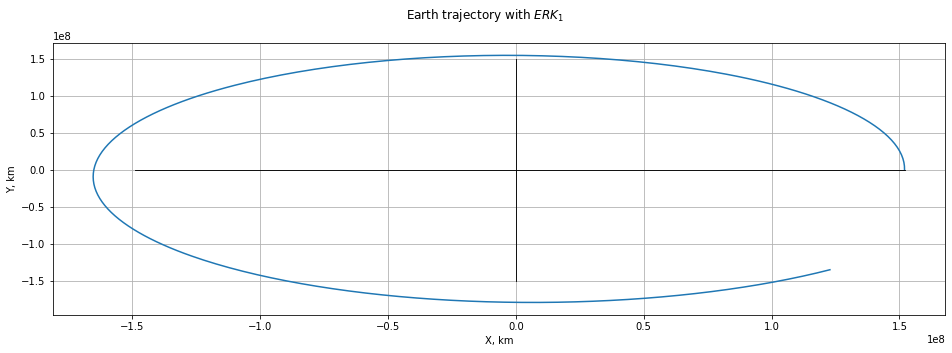

In [6]:
earth(erk1, 1)

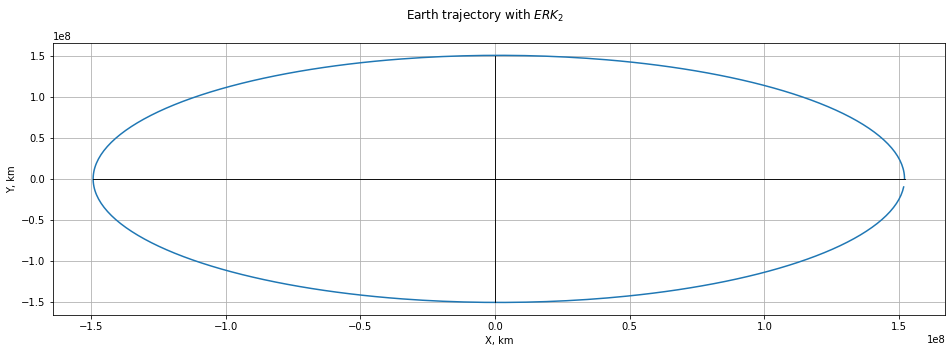

In [7]:
earth(erk2, 2)

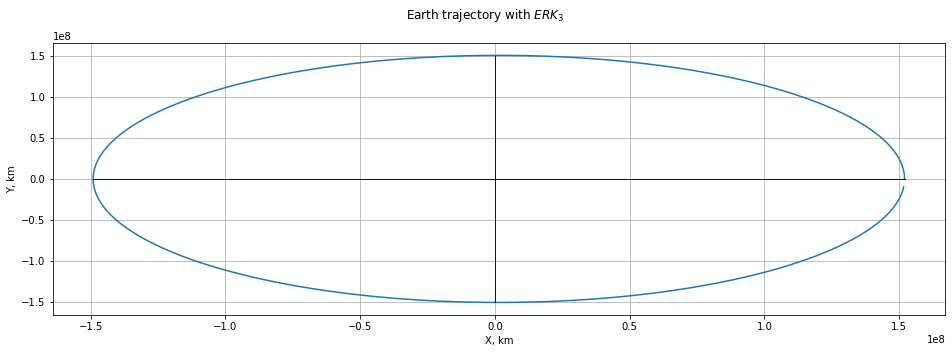

In [8]:
earth(erk3, 3)

### Sun and earth modeling

In [9]:
def sun_earth(f, n):
    u = np.zeros((M + 1, 8))
    u[0,4] = 1.5*10**11 # sun x
    u[0,5] = 0.2*10**11 # sun y
    u[0,6] = 0. # sun Vx
    u[0,7] = 0; # sun Vy

    u[0,0] = 152*10**6*1000 + u[0,4] # earth x
    u[0,1] = 0. + u[0,5] # earth y
    u[0,2] = 0. # earth Vx
    u[0,3] = 29.4*1000; # earth Vy


    u = f(u, tau, M, (m1, m2), G, earth_modeling_2)

    earth_x = u[:, 0] / 1000
    earth_y = u[:, 1] / 1000
    sun_x = u[:, 4] / 1000
    sun_y = u[:, 5] / 1000

    plt.figure(figsize=(16, 5))
    plt.plot(earth_x, earth_y, lw=1, label='earth')
    plt.plot(sun_x, sun_y, '-o', lw=1, label='sun')
    plot(u[0,4]/1000+np.full(10, 0), u[0,5]/1000+np.linspace(-1.5, 1.5, 10)*10**8, color='black', lw=0.9)
    plot(u[0,4]/1000+np.linspace(-1.49, 1.521, 10)*10**8, u[0,5]/1000+np.full(10, 0), color='black', lw=0.9)

    plt.xlabel('X, km'); plt.ylabel('Y, km')
    plt.grid(1)
    plt.legend()
    plt.suptitle(f'Earth and sun trajectories with $ERK_{n}$')

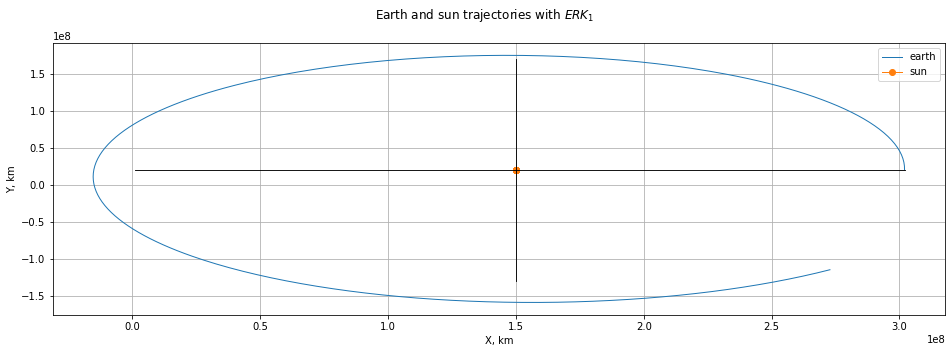

In [10]:
sun_earth(erk1, 1)

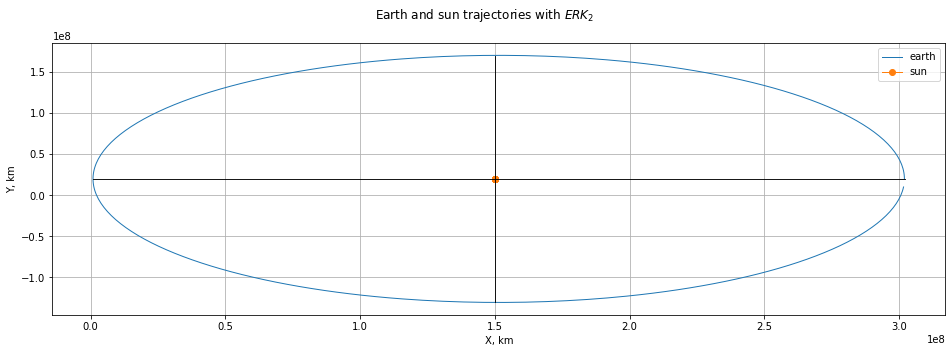

In [11]:
sun_earth(erk2, 2)

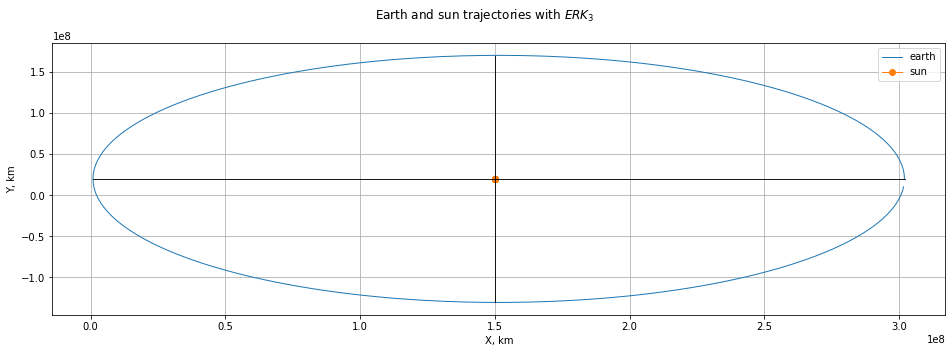

In [12]:
sun_earth(erk3, 3)